In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import GammaRegressor 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PowerTransformer
from numpy.random import randn
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from numpy import sqrt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.cluster import DBSCAN
from scipy.stats import gaussian_kde

#library to create the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
import patsy
import patsylearn

from sklearn.base import BaseEstimator, TransformerMixin
#see parsytransformer.py

#to save and load the pipeline and model fitted in a pickle (.pkl) file
import pickle
import patsy
#import dill as pickle
#import dill

#import geocoder
#from geopy.geocoders import GoogleV3

In [2]:
from make_data import make_df_intercept, make_df_slope, make_df_complex

In [3]:
df_intercept = make_df_intercept()

In [4]:
df_intercept.head()

,x,y,type
0,99.716868,367.869082,A
1,66.286932,181.895018,A
2,79.188319,317.875076,A
3,116.000317,499.537049,A
4,109.374239,371.360048,A


/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


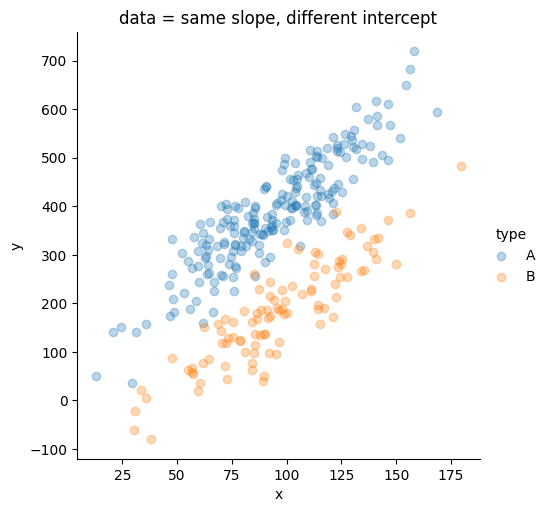

In [5]:
sns.lmplot('x', 'y', df_intercept, hue = 'type', scatter_kws={'alpha':0.3}, fit_reg=False)
plt.title('data = same slope, different intercept')
plt.show()

In [6]:
y = df_intercept['y']
X = df_intercept.drop(columns = ['y'])
X = pd.get_dummies(X)
X['constant'] = 1

In [7]:
X.head(5)

,x,type_A,type_B,constant
0,99.716868,1,0,1
1,66.286932,1,0,1
2,79.188319,1,0,1
3,116.000317,1,0,1
4,109.374239,1,0,1


In [8]:
model = LinearRegression().fit(X, y)
df_intercept['predict'] = model.predict(X)
df_intercept['res'] = df_intercept['y'] - df_intercept['predict']

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


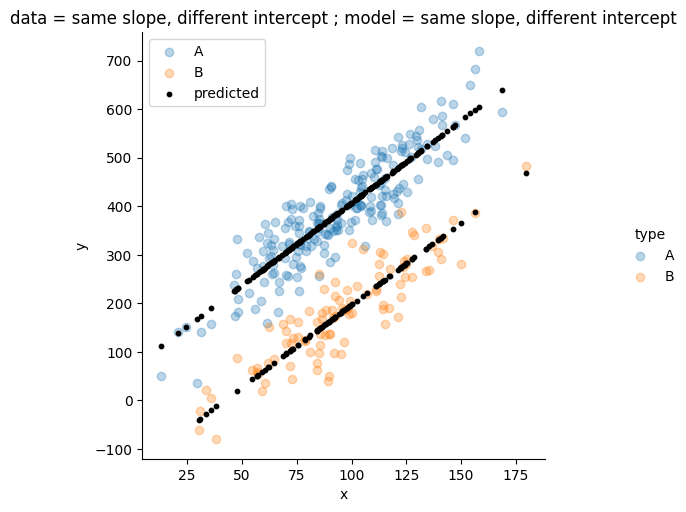

In [9]:
sns.lmplot('x', 'y', df_intercept, hue = 'type', scatter_kws={'alpha':0.3}, fit_reg=False)
plt.scatter(df_intercept['x'], df_intercept['predict'], c ='black', s = 10, label ='predicted')
plt.title('data = same slope, different intercept ; model = same slope, different intercept')
plt.legend()
plt.show()

In [10]:
model.score(X,y)

0.8853625539122754

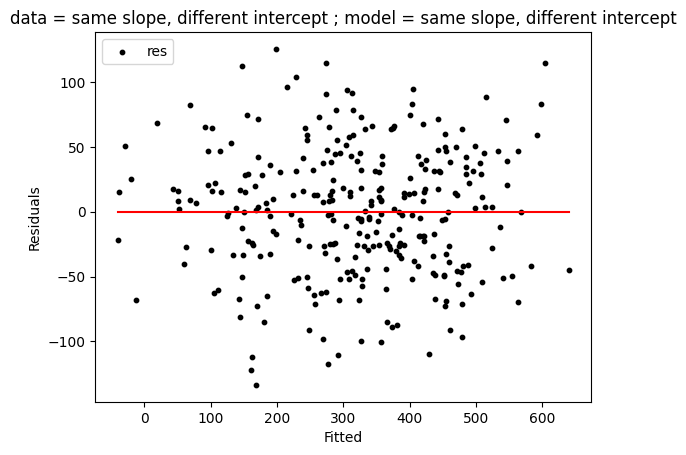

In [11]:
plt.scatter(df_intercept['predict'], df_intercept['res'], c ='black', s = 10, label ='res')
plt.plot([df_intercept['predict'].min(), df_intercept['predict'].max()], [0,0], c ='r')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('data = same slope, different intercept ; model = same slope, different intercept')
plt.legend()
plt.show()

In [12]:
df_slope =make_df_slope()

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


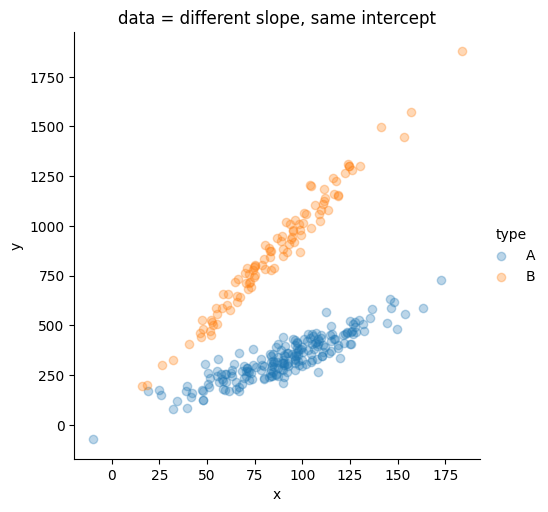

In [13]:
sns.lmplot('x', 'y', df_slope, hue = 'type', scatter_kws={'alpha':0.3}, fit_reg=False)
plt.title('data = different slope, same intercept')
plt.show()

In [14]:
y = df_slope['y']
X = df_slope.drop(columns = ['y'])
X = pd.get_dummies(X)
X['constant'] = 1

In [15]:
X

,x,type_A,type_B,constant
0,100.089458,1,0,1
1,127.479002,1,0,1
2,105.193754,1,0,1
3,80.092122,1,0,1
4,89.987654,1,0,1
...,...,...,...,...
95,51.860149,0,1,1
96,106.487123,0,1,1
97,113.617814,0,1,1
98,54.679860,0,1,1


In [16]:
model = LinearRegression().fit(X, y)
df_slope['predict'] = model.predict(X)
df_slope['res'] = df_slope['y'] - df_slope['predict']

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


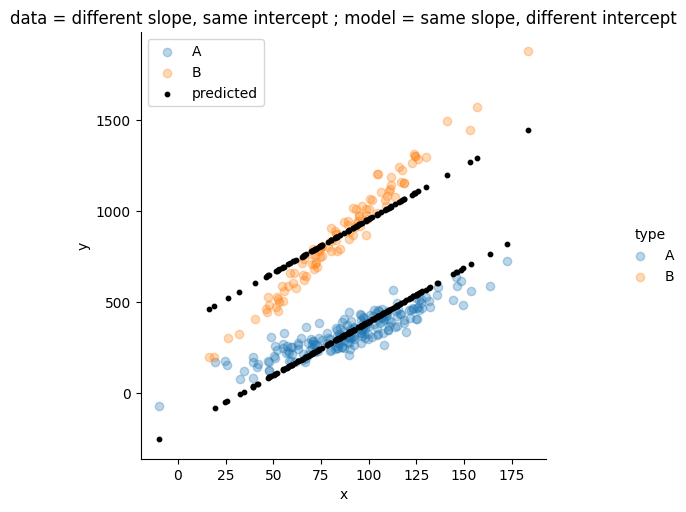

In [17]:
sns.lmplot('x', 'y', df_slope, hue = 'type', scatter_kws={'alpha':0.3}, fit_reg=False)
plt.scatter(df_slope['x'], df_slope['predict'], c ='black', s = 10, label ='predicted')
plt.title('data = different slope, same intercept ; model = same slope, different intercept')
plt.legend()
plt.show()

In [18]:
model.score(X, y)

0.9003775291669158

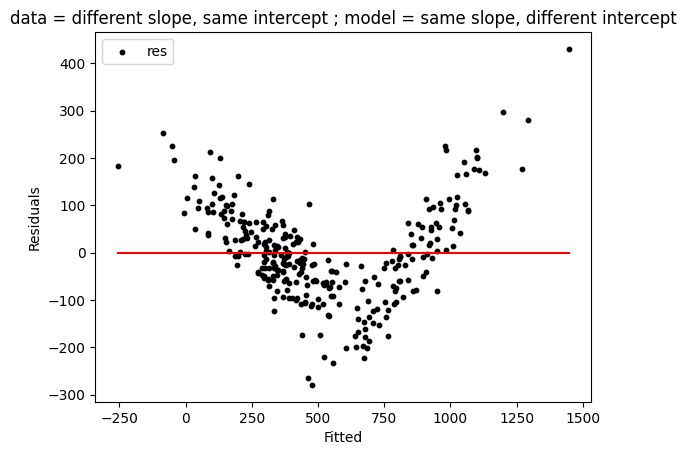

In [19]:
plt.scatter(df_slope['predict'], df_slope['res'], c ='black', s = 10, label ='res')
plt.plot([df_slope['predict'].min(), df_slope['predict'].max()], [0,0], c ='r')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('data = different slope, same intercept ; model = same slope, different intercept')
plt.legend()
plt.show()

In [20]:
df_slope = make_df_slope()
y = df_slope['y']
X = df_slope.drop(columns = ['y'])
X = pd.get_dummies(X)
X['constant'] = 1

In [21]:
X

,x,type_A,type_B,constant
0,133.358439,1,0,1
1,83.644767,1,0,1
2,86.872971,1,0,1
3,134.395782,1,0,1
4,84.187406,1,0,1
...,...,...,...,...
95,102.821170,0,1,1
96,61.115885,0,1,1
97,60.414380,0,1,1
98,80.348308,0,1,1


In [22]:
X['type_A_s'] = X['type_A'] * X['x']
X['type_B_s'] = X['type_B'] * X['x']

In [23]:
X

,x,type_A,type_B,constant,type_A_s,type_B_s
0,133.358439,1,0,1,133.358439,0.000000
1,83.644767,1,0,1,83.644767,0.000000
2,86.872971,1,0,1,86.872971,0.000000
3,134.395782,1,0,1,134.395782,0.000000
4,84.187406,1,0,1,84.187406,0.000000
...,...,...,...,...,...,...
95,102.821170,0,1,1,0.000000,102.821170
96,61.115885,0,1,1,0.000000,61.115885
97,60.414380,0,1,1,0.000000,60.414380
98,80.348308,0,1,1,0.000000,80.348308


In [24]:
model = LinearRegression().fit(X, y)
df_slope['predict'] = model.predict(X)
df_slope['res'] = df_slope['y'] - df_slope['predict']

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


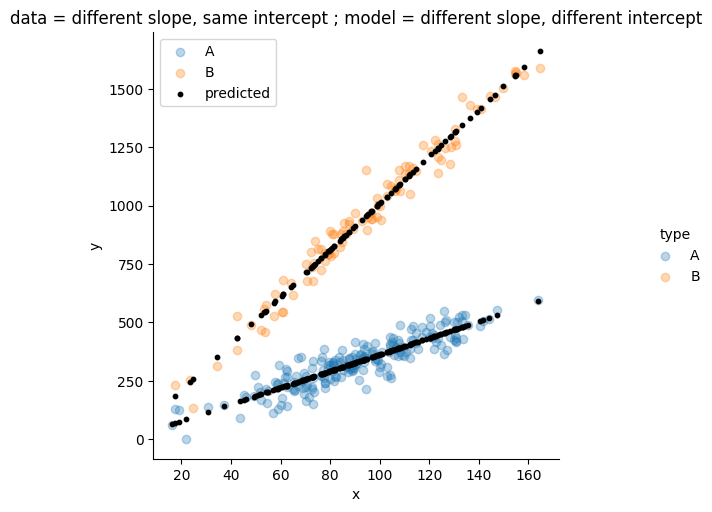

In [25]:
sns.lmplot('x', 'y', df_slope, hue = 'type', scatter_kws={'alpha':0.3}, fit_reg=False)
plt.scatter(df_slope['x'], df_slope['predict'], c ='black', s = 10, label ='predicted')
plt.title('data = different slope, same intercept ; model = different slope, different intercept')
plt.legend()
plt.show()

In [26]:
model.score(X, y)

0.9818820752032235

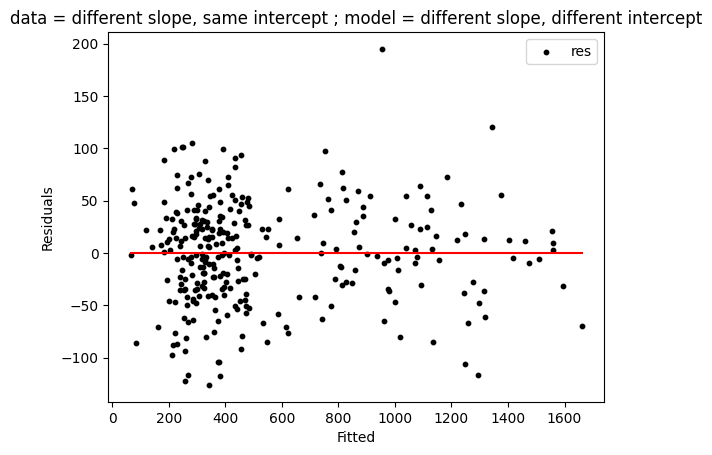

In [27]:
plt.scatter(df_slope['predict'], df_slope['res'], c ='black', s = 10, label ='res')
plt.plot([df_slope['predict'].min(), df_slope['predict'].max()], [0,0], c ='r')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('data = different slope, same intercept ; model = different slope, different intercept')
plt.legend()
plt.show()

In [28]:
#full R type formula would be 'y ~ x + type'

formula1 = 'x + type'

In [29]:
df_slope = make_df_slope()
y = df_slope['y']
X = df_slope.drop(columns = ['y'])

In [30]:
patsify_F1 = patsylearn.PatsyTransformer(formula1, add_intercept=True)

In [31]:
X_F1 = patsify_F1.fit_transform(X)

In [32]:
X_F1 = pd.DataFrame(X_F1)
X_F1

,0,1,2
0,1.0,0.0,50.419152
1,1.0,0.0,54.904983
2,1.0,0.0,41.231738
3,1.0,0.0,98.350246
4,1.0,0.0,34.574016
...,...,...,...
295,1.0,1.0,16.892947
296,1.0,1.0,95.796610
297,1.0,1.0,104.402354
298,1.0,1.0,77.184907


In [33]:
model = LinearRegression().fit(X_F1, y)
df_slope['predict'] = model.predict(X_F1)
df_slope['res'] = df_slope['y'] - df_slope['predict']

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


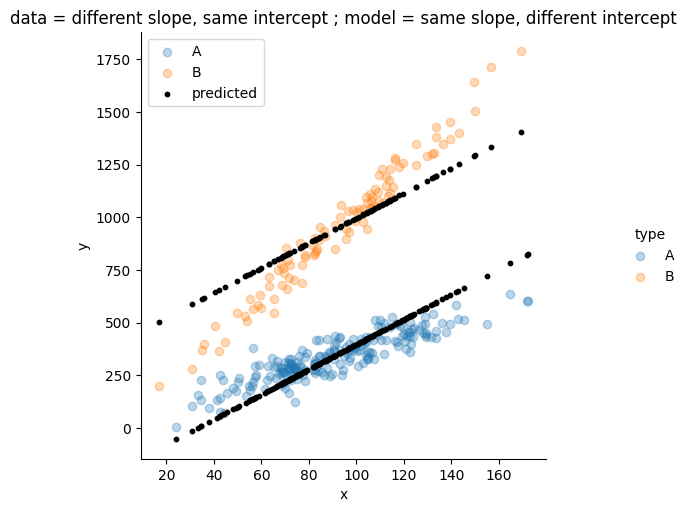

In [34]:
sns.lmplot('x', 'y', df_slope, hue = 'type', scatter_kws={'alpha':0.3}, fit_reg=False)
plt.scatter(df_slope['x'], df_slope['predict'], c ='black', s = 10, label ='predicted')
plt.title('data = different slope, same intercept ; model = same slope, different intercept')
plt.legend()
plt.show()

In [35]:
df_slope = make_df_slope()
y = df_slope['y']
X = df_slope.drop(columns = ['y'])

In [36]:
#full R type formula would be 'y ~ x * type'

formula2 = 'x * type'

In [37]:
patsify_F2 = patsylearn.PatsyTransformer(formula2, add_intercept=True)

In [38]:
X_F2 = patsify_F2.fit_transform(X)

In [39]:
X_F2 = pd.DataFrame(X_F2)
X_F2

,0,1,2,3
0,1.0,0.0,71.234336,0.000000
1,1.0,0.0,5.130972,0.000000
2,1.0,0.0,97.823953,0.000000
3,1.0,0.0,99.655002,0.000000
4,1.0,0.0,85.216366,0.000000
...,...,...,...,...
295,1.0,1.0,44.796976,44.796976
296,1.0,1.0,79.685109,79.685109
297,1.0,1.0,127.185584,127.185584
298,1.0,1.0,66.204377,66.204377


In [40]:
model = LinearRegression().fit(X_F2, y)
df_slope['predict'] = model.predict(X_F2)
df_slope['res'] = df_slope['y'] - df_slope['predict']

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


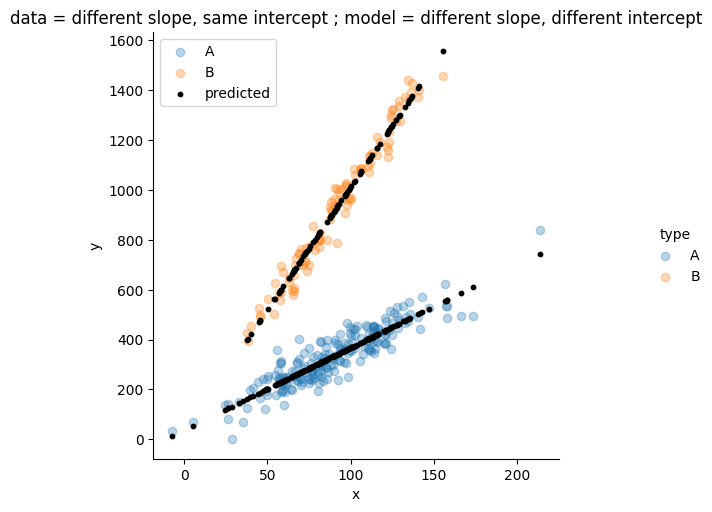

In [41]:
sns.lmplot('x', 'y', df_slope, hue = 'type', scatter_kws={'alpha':0.3}, fit_reg=False)
plt.scatter(df_slope['x'], df_slope['predict'], c ='black', s = 10, label ='predicted')
plt.title('data = different slope, same intercept ; model = different slope, different intercept')
plt.legend()
plt.show()

In [42]:
df_complex = make_df_complex()

In [43]:
df_complex

,x,y,type_a,type_b
0,85.970228,370.638380,A,A
1,70.800681,607.437169,A,A
2,110.729566,670.249951,A,A
3,76.099183,492.325638,A,A
4,102.140252,635.753554,A,A
...,...,...,...,...
95,45.673832,347.949960,B,B
96,90.200279,556.540392,B,B
97,91.673899,816.127046,B,B
98,139.250800,810.481659,B,B


/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


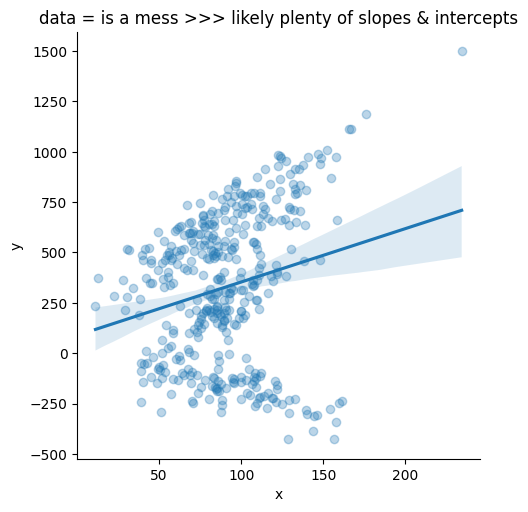

In [44]:
sns.lmplot('x', 'y', df_complex, scatter_kws={'alpha':0.3})
plt.title('data = is a mess >>> likely plenty of slopes & intercepts')
plt.show()

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


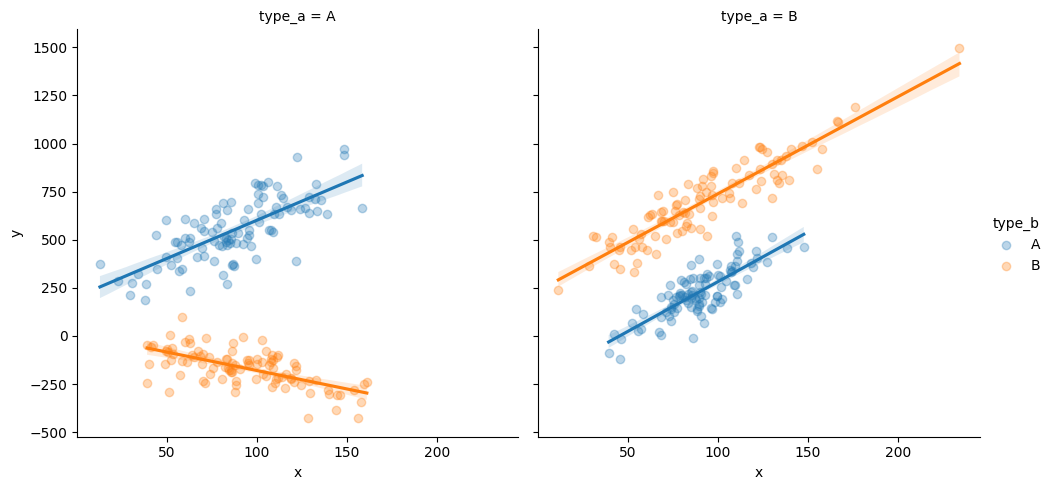

In [45]:
sns.lmplot('x', 'y', df_complex, hue = 'type_b', col = 'type_a', scatter_kws={'alpha':0.3})
plt.show()

In [46]:
formula3 = 'x + type_a + type_b'

In [47]:
df_complex = make_df_complex()
y = df_complex['y']
X = df_complex.drop(columns = ['y'])

In [48]:
X

,x,type_a,type_b
0,116.733007,A,A
1,68.805345,A,A
2,121.918274,A,A
3,115.023674,A,A
4,41.096507,A,A
...,...,...,...
95,57.607869,B,B
96,31.418941,B,B
97,73.762286,B,B
98,93.593189,B,B


In [49]:
patsify_F3 = patsylearn.PatsyTransformer(formula3)

In [50]:
X_F3 = patsify_F3.fit_transform(X)

In [51]:
X_F3 = pd.DataFrame(X_F3)
X_F3

,0,1,2,3
0,1.0,0.0,0.0,116.733007
1,1.0,0.0,0.0,68.805345
2,1.0,0.0,0.0,121.918274
3,1.0,0.0,0.0,115.023674
4,1.0,0.0,0.0,41.096507
...,...,...,...,...
395,0.0,1.0,1.0,57.607869
396,0.0,1.0,1.0,31.418941
397,0.0,1.0,1.0,73.762286
398,0.0,1.0,1.0,93.593189


In [52]:
model = LinearRegression().fit(X_F3, y)
df_complex['predict'] = model.predict(X_F3)
df_complex['res'] = df_complex['y'] - df_complex['predict']

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


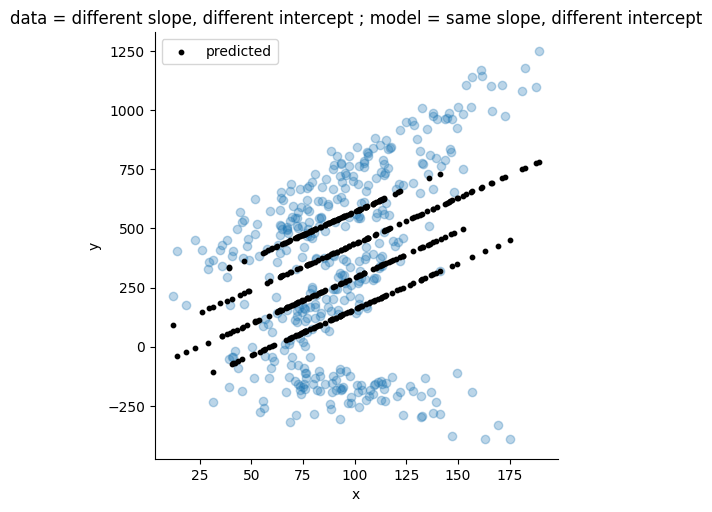

In [53]:
sns.lmplot('x', 'y', df_complex, scatter_kws={'alpha':0.3}, fit_reg=False)
plt.scatter(df_complex['x'], df_complex['predict'], c ='black', s = 10, label ='predicted')
plt.title('data = different slope, different intercept ; model = same slope, different intercept')
plt.legend()
plt.show()

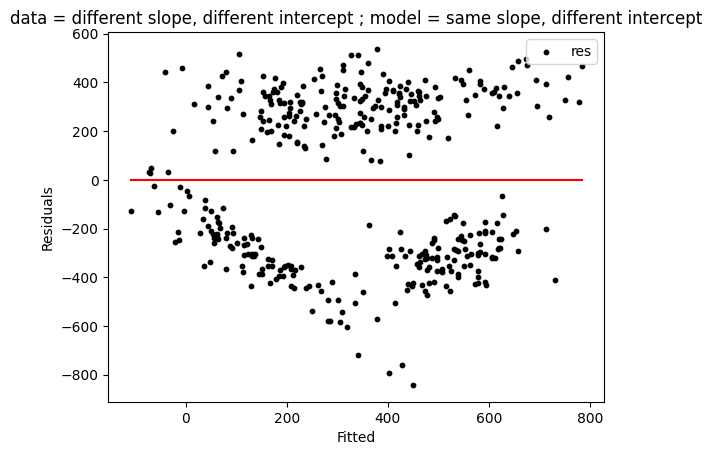

In [54]:
plt.scatter(df_complex['predict'], df_complex['res'], c ='black', s = 10, label ='res')
plt.plot([df_complex['predict'].min(), df_complex['predict'].max()], [0,0], c ='r')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('data = different slope, different intercept ; model = same slope, different intercept')
plt.legend()
plt.show()

In [55]:
model.score(X_F3, y)

0.26308121180190847

Check how the formula4 differs from the formula3 >>>> '+' are now '*' which allows different slopes to be fitted across categorial features  

In [56]:
formula4 = 'x * type_a * type_b'

In [57]:
df_complex = make_df_complex()
y = df_complex['y']
X = df_complex.drop(columns = ['y'])

In [58]:
patsify_F4 = patsylearn.PatsyTransformer(formula4)
X_F4 = patsify_F4.fit_transform(X)

In [59]:
X_F4 = pd.DataFrame(X_F4)
X_F4

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,0.0,116.453228,0.000000,0.000000,0.000000
1,1.0,0.0,0.0,0.0,91.050708,0.000000,0.000000,0.000000
2,1.0,0.0,0.0,0.0,96.201955,0.000000,0.000000,0.000000
3,1.0,0.0,0.0,0.0,52.209854,0.000000,0.000000,0.000000
4,1.0,0.0,0.0,0.0,98.846714,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
395,0.0,1.0,1.0,1.0,171.381929,171.381929,171.381929,171.381929
396,0.0,1.0,1.0,1.0,104.148367,104.148367,104.148367,104.148367
397,0.0,1.0,1.0,1.0,114.161958,114.161958,114.161958,114.161958
398,0.0,1.0,1.0,1.0,50.835980,50.835980,50.835980,50.835980


In [60]:
model = LinearRegression().fit(X_F4, y)
df_complex['predict'] = model.predict(X_F4)
df_complex['res'] = df_complex['y'] - df_complex['predict']

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


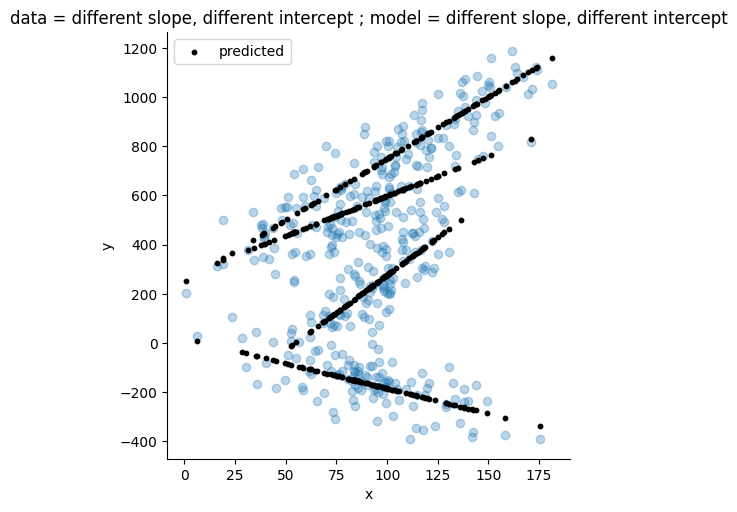

In [61]:
sns.lmplot('x', 'y', df_complex, scatter_kws={'alpha':0.3}, fit_reg=False)
plt.scatter(df_complex['x'], df_complex['predict'], c ='black', s = 10, label ='predicted')
plt.title('data = different slope, different intercept ; model = different slope, different intercept')
plt.legend()
plt.show()

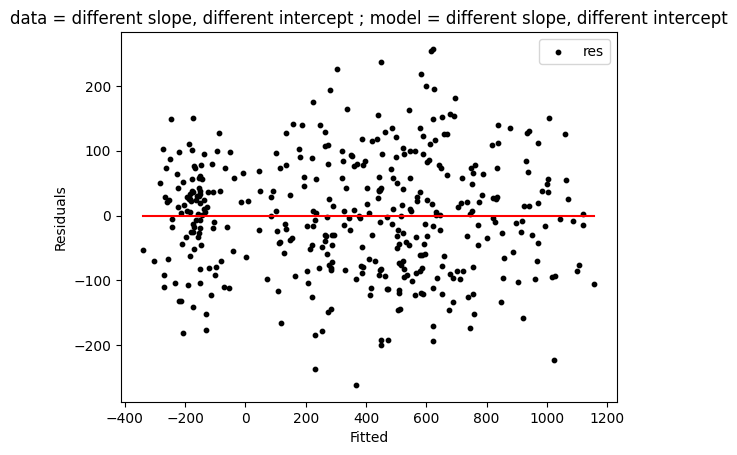

In [62]:
plt.scatter(df_complex['predict'], df_complex['res'], c ='black', s = 10, label ='res')
plt.plot([df_complex['predict'].min(), df_complex['predict'].max()], [0,0], c ='r')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('data = different slope, different intercept ; model = different slope, different intercept')
plt.legend()
plt.show()

In [63]:
model.score(X_F4, y)

0.9468698371223646